# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def data_loading(p1, p2):
  task1 = pd.read_csv(p1)
  task2 = pd.read_csv(p2)
  return task1, task2

In [3]:
train, test = data_loading('CE802_P2_Data.csv', 'CE802_P2_Test.csv')

# descriptive analysis

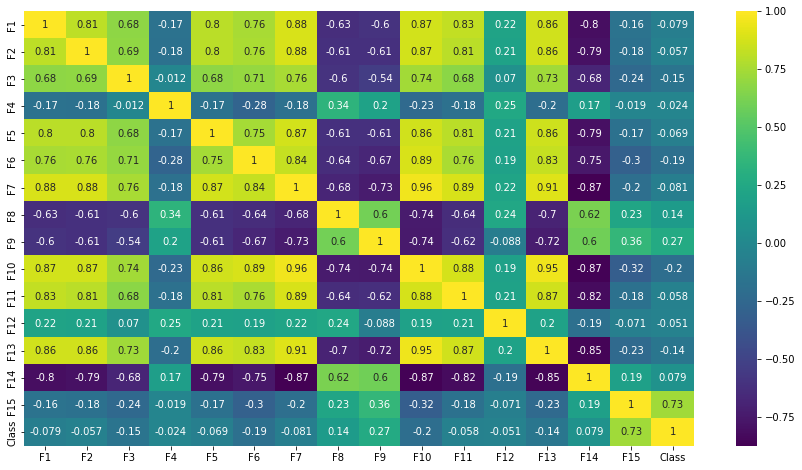

In [4]:
plt.figure(figsize = (15,8))
sns.heatmap(train.corr(), annot = True, cmap = 'viridis')

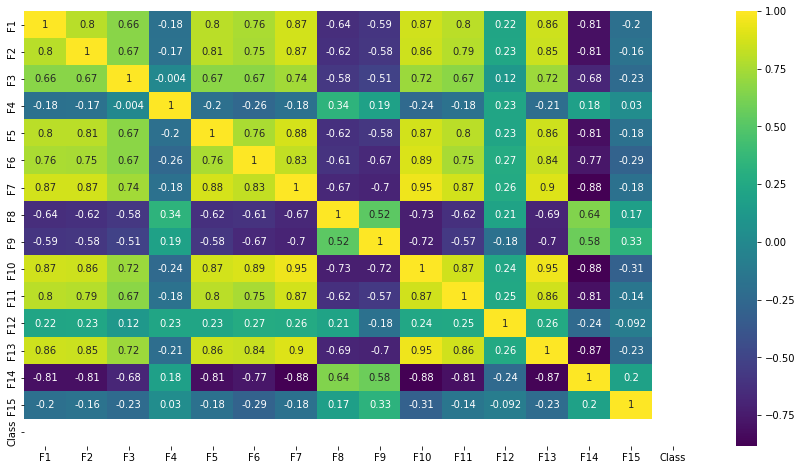

In [5]:
plt.figure(figsize = (15,8))
sns.heatmap(test.corr(), annot = True, cmap = 'viridis')

In [6]:
train.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

In [7]:
test.isnull().sum()

F1          0
F2          0
F3          0
F4          0
F5          0
F6          0
F7          0
F8          0
F9          0
F10         0
F11         0
F12         0
F13         0
F14         0
F15       750
Class    1500
dtype: int64

In [8]:
train = train.drop(columns = 'F15')
test = test.drop(columns = ['F15','Class'])

# Encoding Data

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train['Class'] = encoder.fit_transform(train['Class'])

# Feature and Target Selection

In [10]:
# first dataset feature selection and splitting
train_features = train.drop(columns = 'Class')
train_labels = train['Class']
test_features = test

In [11]:
train_features.shape

(1500, 14)

# Data Splitting

In [12]:
# Data splitting 
from sklearn.model_selection import train_test_split
train1, test1, train2, test2 = train_test_split(train_features, train_labels, test_size=0.25)

# classification models

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(train1, train2)
decision_pred = tree.predict(test1)

In [14]:
from sklearn.ensemble import RandomForestClassifier
forest = DecisionTreeClassifier()
forest.fit(train1, train2)
random_pred = forest.predict(test1)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gbclassifier = GradientBoostingClassifier()
gbclassifier.fit(train1, train2)
gb_pred = gbclassifier.predict(test1)

#Classification Accuracies

In [16]:
from sklearn.metrics import accuracy_score, r2_score
print('accuracy of decision tree classifier is ', accuracy_score(test2, decision_pred))
print('accuracy of random forest classifier', accuracy_score(test2, random_pred))
print('accuracy of gradient Boosting classifier', accuracy_score(test2, gb_pred))

accuracy of decision tree classifier is  0.7493333333333333
accuracy of random forest classifier 0.768
accuracy of gradient Boosting classifier 0.8666666666666667


# predictions on test dataset

In [17]:
decision_tree_pred = tree.predict(test_features)
gradient_pred = gbclassifier.predict(test_features)
random_forest_pred = forest.predict(test_features)

In [18]:
test['Tree Pred'] = decision_tree_pred
test['gradient Pred'] = gradient_pred
test['random Pred'] = random_forest_pred

In [19]:
test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Tree Pred,gradient Pred,random Pred
0,-8.67,-25.56,21,13.14,-7.45,5.55,10.29,-30.98,-476.72,2,-1.17,61.66,0.23,3.76,0,0,0
1,-8.31,-29.19,10,12.16,-7.66,5.22,10.22,-30.98,-422.72,2,-0.96,79.66,0.02,1.22,0,0,0
2,-0.84,-25.29,110,12.34,-3.72,20.70,17.32,-76.98,-778.72,20,11.10,-20.34,5.75,-1.97,1,1,1
3,0.90,-14.94,120,9.44,-3.44,28.05,15.52,-56.98,-858.72,20,6.33,229.66,8.05,-1.77,0,0,0
4,-0.33,-9.60,345,14.26,-3.32,34.80,15.07,-36.98,-458.72,20,12.18,129.66,9.80,-2.17,1,0,0


In [20]:
test.to_csv('test predictions.csv')